In [23]:
import sys
sys.path.append('../../Scripts')
from PostProcessingScripts import * 
import pandas as pd 
import string 
# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
fs=20

np.seterr(divide='ignore', invalid='ignore') # to ignore dividing by zero warnings for ratio plot

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Plot figure 1 

The function & blocks below plot Figure 1 of the Double Compact Object Paper. The data is summarized in several csv files that you can download from the corresponding Zenodo directory. 
The data for this plot are given in the directory summary_data_Fig_1, and are called 
 - formationRatesTotalAndPerChannel_BHBH_.csv
 - formationRatesTotalAndPerChannel_BHNS_.csv
 - formationRatesTotalAndPerChannel_NSNS_.csv
    
they contain more information (namely the rates for all formation channels), but we will only use the "total" rate here. 

You will have to change the path in the code to the path where your folder summary_data_Fig_1 is located to read in the pandas files. 




In [24]:






def plotFormationChannelsPerMetallicitySingle(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH'):
    
    
    # start building from 0
    upperY = np.zeros_like(formationRates[0])
    lowerY = np.zeros_like(formationRates[0])
    
    solar=0.0142

    total = 0 
    for ind_c, c_rate in enumerate(formationRates):
        total += c_rate 
    
    total_sum = np.sum(total)
    
    for ind_c, c_rate in enumerate(formationRates):
        
        # add this rate, 
        upperY += c_rate
        percentage = (np.sum(c_rate) / total_sum)*100.
        percentage_str =  r'$%s$'%str((roundAndFormat1(percentage))) + str(r'\%')
        
        axe.fill_between(metallicities, lowerY*1e5, upperY*1e5, facecolor=colorlist[ind_c], \
                  lw=3, alpha=1, label=percentage_str)
        lowerY += c_rate
    
   

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        axe.plot([zz,zz], [0,Ylim+1], \
                         c='k',\
                         lw=1.2, alpha=1, linestyle=':', zorder=100)   
        axe.text(zz-0.06, Ylim-0.022, s=text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   





        
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.02, .5
        
    axe.legend(fontsize=14,  ncol=2, \
               bbox_to_anchor=(x_box, y_box),loc="lower left", borderaxespad=0., frameon=False).set_zorder(10000)
   
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(0,Ylim)
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) +'\n' + alphabetPhysicalNameDict[BPSmodelname], xy=(0.042, .95),\
                 xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                zorder=1E10)

    
    return axe
    
    

# for labeling

In [25]:
# nModels=17
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
#                'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

# alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


# physicalNamesBPSmodels = [r'\textbf{fiducial}',\
#                            r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
#                            r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
#                           r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
#                           r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=30\,\rm{km}\,\rm{s}^{-1}$',\
#                           r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



# alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



# print(alphabetPhysicalNameDict['E'])

# Plot Figure 1 , formation rate of DCO mergers as a function of metallicity

now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


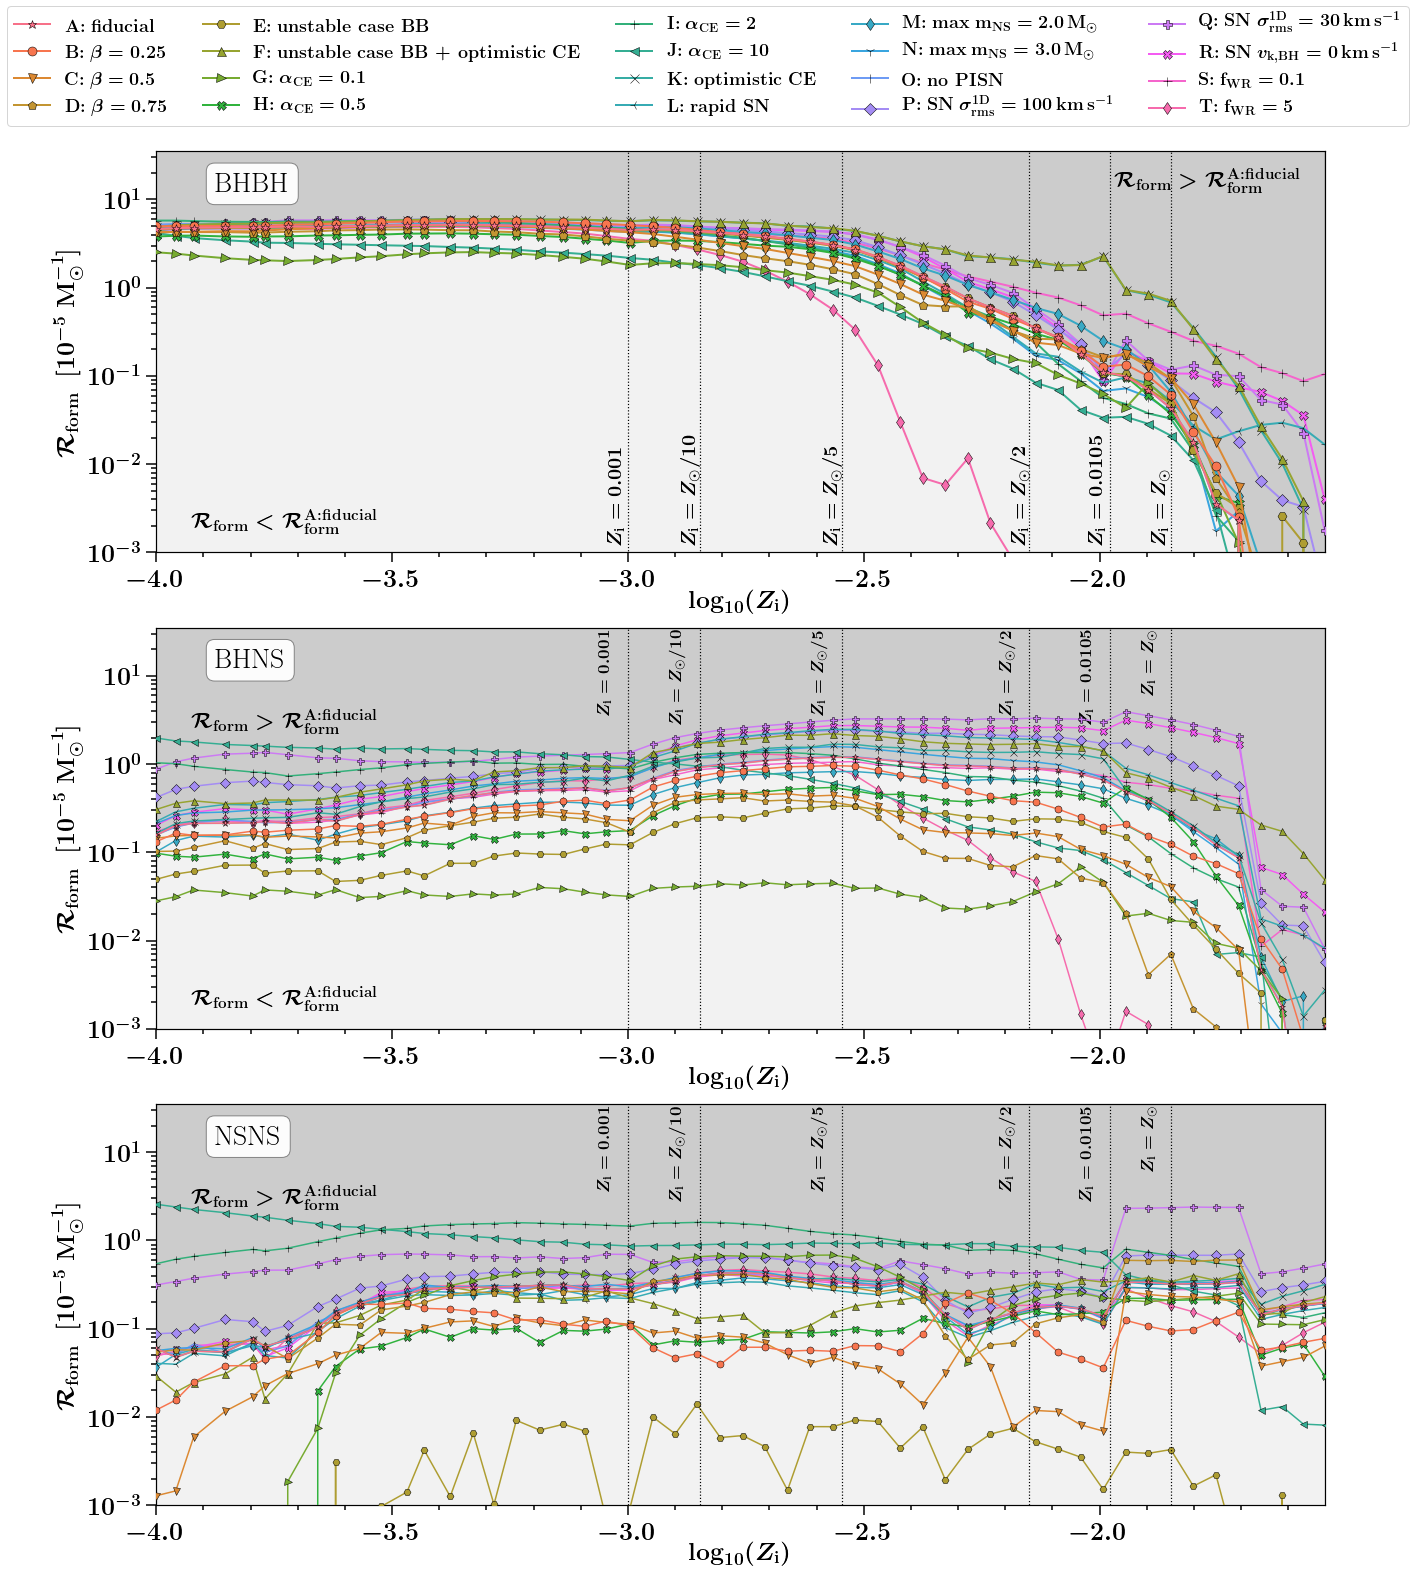

In [26]:
# In a pyramid shape 

def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

    ncols=1
    nrows=3
    f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  



    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
#     nModels=20
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
#     BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel: 
            upperY = np.asarray(df[key_])
            del key_

            if ind_t==0:  
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
            else:
                labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
            if ind_t==0:
                lw=2
                ms = 9 
            else:
                lw=1.5
                ms = 7
            axe.plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
                      lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
#             without gray lines, but with facecolor between fiducial 
            if ind_m==0:
                axe.fill_between(log10metallicities, (1E-3)*np.ones_like(upperY), upperY*1e5, color='gray', alpha=0.1)
                axe.fill_between(log10metallicities,  upperY*1e5, (100)*np.ones_like(upperY),color='gray', alpha=0.4)
                
                
                
#             if ind_t!=0:
#                 ax1.plot(log10metallicities, upperY*1e5, color='gray',\
#                          lw=lw, alpha=0.2, marker=markershapes[ind_m], markersize=ms-2,markeredgecolor='k',mew=0.5,\
#                          linestyle='-', zorder=0, label=labelname)
            
            
            
            
        y_top=35
        if ind_t ==0:    
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'

        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

        # set yscale and x and y limits 
        axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.001,top=y_top)

            
        # add which DCO type we are plotting in the top left    
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
        # add a label for the gray areas in the background 
        if ind_t in [1,2]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
        if ind_t in [0,1]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
            if ind_t==0:
                axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")


    # add legend, 
    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
         bbox_to_anchor=(1.08, 3.76)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
#     plt.savefig('./FormationRateAllModels3panels_vertical.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
#     plt.savefig('./FormationRateAllModels3panels_vertical.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


In [21]:
# # In a pyramid shape 

# def Reverse(lst): 
#     return [ele for ele in reversed(lst)]


# def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

#     ncols=1
#     nrows=3
#     f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
#                   gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  



    
#     Types      = ['BBH', 'BHNS',  'BNS']
#     TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
#     nModels=15
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
#     BPScolors       = sns.color_palette("husl", len(BPSnameslist))
#     markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|"]
#     solar = 0.0142

#     dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

#     metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
#            0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
#            0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
#            0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
#            0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
#            0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
#            0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
#            0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

#     log10metallicities= np.log10(np.asarray(metallicities))
    
    
#     temp = range(nModels+3)
#     zorderlist = Reverse(temp)

    
#     for ind_t, DCOtype in enumerate(Types):
#         axe = ax[ind_t]
#         print('now at DCO type  ', DCOtype)
        
#         DCOname = dictDCOtypeDCOlabel[DCOtype]
#         df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
#         for ind_m, bps_model in enumerate(BPSnameslist):
            
# #             print('now at model ', alphabetDirDict[bps_model])

#             c_ = 'total'
#             key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
#             # rate of this channel: 
#             upperY = np.asarray(df[key_])
#             del key_

#             if ind_t==0:  
#                 labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
# #                 print(labelname)
#             else:
#                 labelname=None

#             if ind_m ==0:
#                 mt="*"
#             else:
#                 mt=None
                
#             if ind_t==0:
#                 lw=2
#                 ms = 9 
#             else:
#                 lw=1.5
#                 ms = 7
#             axe.plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
#                       lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
#                             linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
# #             without gray lines, but with facecolor between fiducial 
#             if ind_m==0:
#                 axe.fill_between(log10metallicities, (1E-3)*np.ones_like(upperY), upperY*1e5, color='gray', alpha=0.1)
#                 axe.fill_between(log10metallicities,  upperY*1e5, (100)*np.ones_like(upperY),color='gray', alpha=0.4)
                
                
                
# #             if ind_t!=0:
# #                 ax1.plot(log10metallicities, upperY*1e5, color='gray',\
# #                          lw=lw, alpha=0.2, marker=markershapes[ind_m], markersize=ms-2,markeredgecolor='k',mew=0.5,\
# #                          linestyle='-', zorder=0, label=labelname)
            
            
            
            
#         y_top=35
#         if ind_t ==0:    
#             handles, labels = axe.get_legend_handles_labels()
            

#         # plot Z values for some fixed metallicities
#         text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
#                      r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
#                      r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
#         for zz_ind, zz in enumerate([np.log10(solar), \
#                                      np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
#                                      np.log10(0.0105)]) :
#             axe.plot([zz,zz], [0,y_top+1], \
#                              c='k',\
#                              lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
#             if ind_t==0:
#                 axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
#             else:
#                 axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
#         nameX = r'$\log_{10}(Z_{\rm{i}})$'

#         nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
#         axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

#         # set yscale and x and y limits 
#         axe.set_yscale('log')
#         axe.set_xlim(min(log10metallicities), max(log10metallicities))
#         axe.set_ylim(bottom=0.001,top=y_top)

            
#         # add which DCO type we are plotting in the top left    
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#         axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
#         # add a label for the gray areas in the background 
#         if ind_t in [1,2]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#         if ind_t in [0,1]:
#             axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
#             if ind_t==0:
#                 axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")


#     # add legend, 
#     plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=18, ncol=5,\
#          bbox_to_anchor=(1.05, 3.70)) #,  markerscale=3., scatterpoints=1)
    
    
#     # save as png and pdf, 
#     plt.savefig('./FormationRateAllModels3panels_vertical2.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
#     plt.savefig('./FormationRateAllModels3panels_vertical2.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
#     plt.show()
#     plt.close() 

# # plot Figure for Formation yield of DCO mergers as a function of metallicity    
# plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


# Plot rate ratios: (Figure B1)

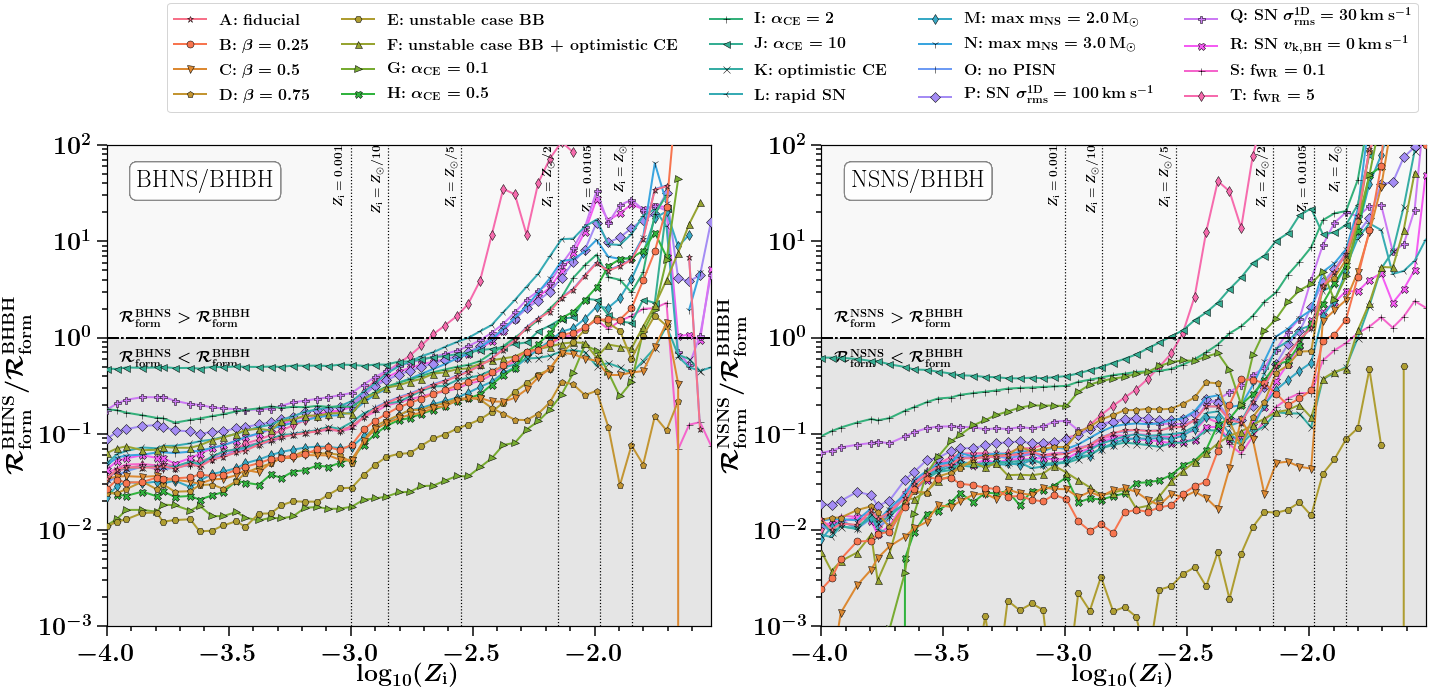

In [29]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatioRatePerZ(pathCSVfile='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=2
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS/BHBH',  'NSNS/BHBH']
#     nModels=17
#     BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
#     BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
   
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    for ind_m, bps_model in enumerate(BPSnameslist):
        for ind_t, DCOtype in enumerate(Types):
            

            DCOname = dictDCOtypeDCOlabel[DCOtype]
            df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel:             
            upperY = np.asarray(df[key_])

            del key_
     

            labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
#             else:
#                 labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
                
            if ind_t==0:
                upperY_BHBH = upperY
            elif ind_t==1:
                upperY_BHNS = upperY
            elif ind_t==2:
                upperY_NSNS = upperY
      
        
        BHNSratio = upperY_BHNS/upperY_BHBH
        NSNSratio = upperY_NSNS/upperY_BHBH
        
        axe[0].plot(log10metallicities, BHNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
        axe[1].plot(log10metallicities, NSNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=None)         
        y_top=100
        
        if ind_m==0:
            for ind_axx, axex in enumerate([axe[0], axe[1]]):
                txts_above = [r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} > \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$', r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} > \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$']
                txts_below = [r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} < \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$', r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} < \mathcal{R}_{\rm{form}}^{\rm{BHBH}}$']
                axex.fill_between(log10metallicities, np.ones_like(log10metallicities), y_top*np.ones_like(log10metallicities), color='gray', alpha=0.05)
                axex.fill_between(log10metallicities, 0.001*np.ones_like(log10metallicities), np.ones_like(log10metallicities), color='gray', alpha=0.2)
                
                axex.text(-3.95, 1*1.2, s=txts_above[ind_axx], fontsize=fs-4, rotation=0, verticalalignment='bottom', ha='left')
                axex.text(-3.95, 1/1.4, s=txts_below[ind_axx], fontsize=fs-4, rotation=0, verticalalignment='top', ha='left')
    #             axe.fill_between(log10metallicities,  upperY*1e5, (100)*np.ones_like(upperY),color='gray', alpha=0.4)



 

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        for ind_ax in range(2):
            axe[ind_ax].plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  

            axe[ind_ax].text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')

            axe[ind_ax].plot([min(log10metallicities), max(log10metallicities)], [1,1], \
                             c='k',\
                             lw=1.8, alpha=1, linestyle='-.', zorder=100) 

            nameX = r'$\log_{10}(Z_{\rm{i}})$'
            if ind_ax==0:
                nameY = r'$\mathcal{R}_{\rm{form}}^{\rm{BHNS}} / \mathcal{R}_{\rm{form}}^{\rm{BHBH}}   $'
            else:
                nameY = r'$\mathcal{R}_{\rm{form}}^{\rm{NSNS}} / \mathcal{R}_{\rm{form}}^{\rm{BHBH}}  $'
            axe[ind_ax] = layoutAxes(axe[ind_ax], nameX=nameX, nameY=nameY)




            axe[ind_ax].set_yscale('log')
            aBit =0.
            axe[ind_ax].set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
            axe[ind_ax].set_ylim(bottom=0.001,top=1.*y_top)



            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            axe[ind_ax].annotate(r'%s'%(TypesLabels[ind_ax+1]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+4, weight = 'bold', ha='left', va="top",bbox=bbox_props)


  
    handles, labels = axe[0].get_legend_handles_labels()     
        
    lgd = f.legend(handles, labels, fontsize=fs-4, ncol=5,\
                         bbox_to_anchor=(.99, 1.22)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  
    plt.tight_layout()
#     lgd2=plt.legend(handles, labels , fontsize=16, ncol=6,\
#          bbox_to_anchor=(.74, 1.30)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRatioRateAllModels3panels.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRatioRateAllModels3panels.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close() 

    
plotFormationRatioRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


 # OLD 

# Alternative way of plotting the rates next to each other

In [ ]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel: 
            upperY = np.asarray(df[key_])
            del key_

            if ind_t==0:  
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
            else:
                labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
      
            axe[ind_t].plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
                      lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
            
        y_top=35
        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe[ind_t].plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            axe[ind_t].text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    

    

        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=y_top)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+4, weight = 'bold', ha='left', va="top",bbox=bbox_props)


    

    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=20, ncol=5,\
         bbox_to_anchor=(.452, 1.30)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRateAllModels3panels_long.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRateAllModels3panels_long.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


# or in 1 + 2 underneath shape

In [ ]:
# In a pyramid shape 

def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    

    f, axe= plt.subplots(figsize=(18,16))

    #define the position of the axes where the pie charts will be plotted
    ax1 = plt.subplot2grid((2, 2), (0, 0),colspan=2) # setting colspan=2 will
    ax2 = plt.subplot2grid((2, 2), (1, 0))           # move top pie chart to the middle
    ax3 = plt.subplot2grid((2, 2), (1, 1))

    axe_ind = [ax1,ax2,ax3]
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        axe = axe_ind[ind_t]
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel: 
            upperY = np.asarray(df[key_])
            del key_

            if ind_t==0:  
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
            else:
                labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
            if ind_t==0:
                lw=2
                ms = 9 
            else:
                lw=1.5
                ms = 7
            axe.plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
                      lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
#             without gray lines, but with facecolor between fiducial 
            if ind_m==0:
                axe.fill_between(log10metallicities, (1E-3)*np.ones_like(upperY), upperY*1e5, color='gray', alpha=0.1)
                axe.fill_between(log10metallicities,  upperY*1e5, (100)*np.ones_like(upperY),color='gray', alpha=0.4)
                
                
                
#             if ind_t!=0:
#                 ax1.plot(log10metallicities, upperY*1e5, color='gray',\
#                          lw=lw, alpha=0.2, marker=markershapes[ind_m], markersize=ms-2,markeredgecolor='k',mew=0.5,\
#                          linestyle='-', zorder=0, label=labelname)
            
            
            
            
        y_top=35
        if ind_t ==0:    
            handles, labels = axe.get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe.plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            if ind_t==0:
                axe.text(zz-0.038, 1.2*0.001, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
            else:
                axe.text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')

    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'

        nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\   $'
#         nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    

    

        axe.set_yscale('log')
        aBit =0.
        axe.set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
        axe.set_ylim(bottom=0.001,top=y_top)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
        if ind_t in [1,2]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
        if ind_t in [0,1]:
            axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
            if ind_t==0:
                axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")



    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=19, ncol=5,\
         bbox_to_anchor=(1.05, 2.50)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRateAllModels3panels_woutGray.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.savefig('./FormationRateAllModels3panels_woutGray.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    
